When one thinks of Deep Learning, the well-known libraries such as Keras, PyTorch or TensorFlow immediately come to mind. Most of us may not know that the very popular machine learning library Scikit-Learn is also capable of basic deep learning modeling.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

## MLPClassifier for binary Classification

The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps input data sets to a set of appropriate outputs. An MLP consists of multiple layers and each layer is fully connected to the following one. The nodes of the layers are neurons with nonlinear activation functions, except for the nodes of the input layer. Between the input and the output layer there may be one or more nonlinear hidden layers.

In [2]:
df = pd.read_csv('Datasets\winequality.csv').dropna()
df

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets\\winequality.csv'

In [ ]:
#Let’s have a look at the target variable:

df['type'].value_counts()

In [ ]:
#Data pre-processing

x = df.drop('type', axis=1)
y = df['type']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

To train a MLP network, the data should always be scaled because it is very sensitive to it.

In [ ]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

Before we train a first MLP, Let's understand something about the parameters.

Suppose we have two predictor variables and want to do a binary classification. For this I can enter the following parameters at the model:

hidden_layer_sizes : With this parameter we can specify the number of layers and the number of nodes we want to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position, where i is the index of the tuple. Thus, the length of the tuple indicates the total number of hidden layers in the neural network.

max_iter: Indicates the number of epochs.

activation: The activation function for the hidden layers.

solver: This parameter specifies the algorithm for weight optimization over the nodes.

The network structure created in the process would look like this

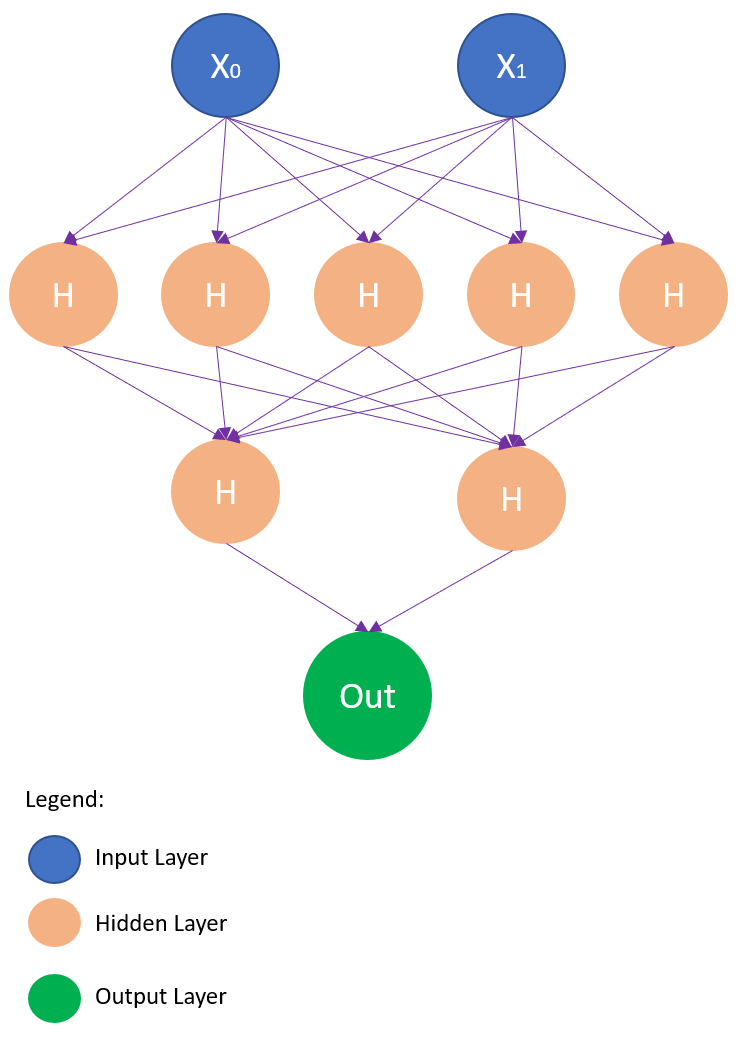

So let’s train our first MLP (with a higher number of layers):

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

# Model Evaluation

In [ ]:
y_pred = mlp_clf.predict(testX_scaled)

#print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

print(accuracy_score(testY, y_pred))

fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()

In [ ]:
print(classification_report(testY, y_pred))

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Hyper Parameter Tuning

param_grid = {
    'hidden_layer_sizes': [(50,60), (30,40,5)],
    'max_iter': [25, 50],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(testX_scaled)

In [ ]:
#print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))
accuracy_score(testY, grid_predictions)

## MLPClassifier for Multi-Class Classification

With an MLP, multi-class classifications can of course also be carried out.

In [ ]:
# Loading the data
df = pd.read_csv('Datasets\iris.csv')
df

In [ ]:
df['Species'].value_counts()

In [ ]:
# Data pre-processing
x = df.drop('Species', axis=1)
y = df['Species']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [ ]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [ ]:
#MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

In [ ]:
# Model Evaluation
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

In [ ]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

In [ ]:
print(classification_report(testY, y_pred))

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Hyper Parameter Tuning
param_grid = {
    'hidden_layer_sizes': [(500,600), (300,400,50)],
    'max_iter': [250, 500],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

In [ ]:
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))